# Import packages:

In [1]:
import TESS_Localize as tl
import astropy.units as u
import lightkurve as lk

# Modes of interest and Target Pixel File setup:

In [2]:
low_frequency_list = [9.51112996, 19.02225993, 28.53338989, 38.04451986, 47.55564982, 57.06677979, 66.57790975, 76.08903972]

In [2]:
high_frequency_list = [500.559, 506.057, 642.255, 740.266, 884.017, 889.556, 957.817, 963.28, 969.013, 1028.729, 1034.356, 1107.713, 1212.297, 1217.872, 1223.429]

In [3]:
search_result = lk.search_targetpixelfile('TIC117070953')
tpf = search_result.download(quality_bitmask='default')

C:\Users\higgi\anaconda3\lib\site-packages\lightkurve\search.py:346: LightkurveWarning: Warning: 2 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(


# Using TESS_Localize:

* Used in this example to show that two set of signals found in the pipeline aperture can be attributed to entirely different sources

## Examine PCA:

In [6]:
low_pca = tl.PCA(targetpixelfile=tpf, frequencies=low_frequency_list, frequnit=u.uHz, principal_components = 5)

C:\Users\higgi\anaconda3\lib\site-packages\astropy\units\quantity.py:479: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


In [4]:
high_pca = tl.PCA(targetpixelfile=tpf, frequencies=high_frequency_list, frequnit=u.uHz, principal_components = 5)

C:\Users\higgi\anaconda3\lib\site-packages\astropy\units\quantity.py:479: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
C:\Users\higgi\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


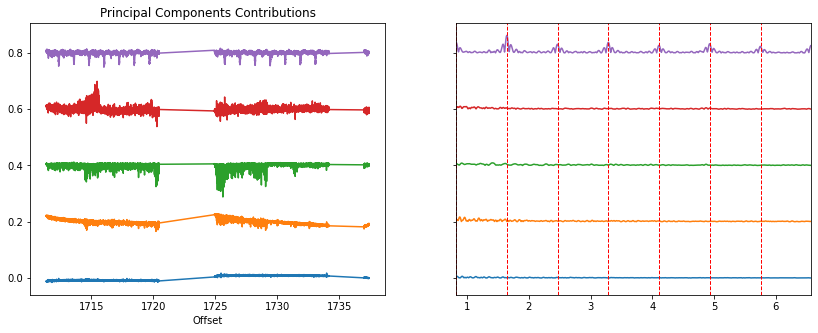

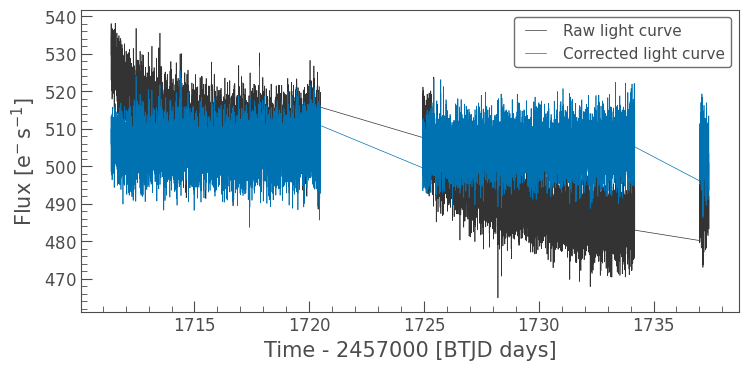

In [8]:
low_pca.plot_pca()

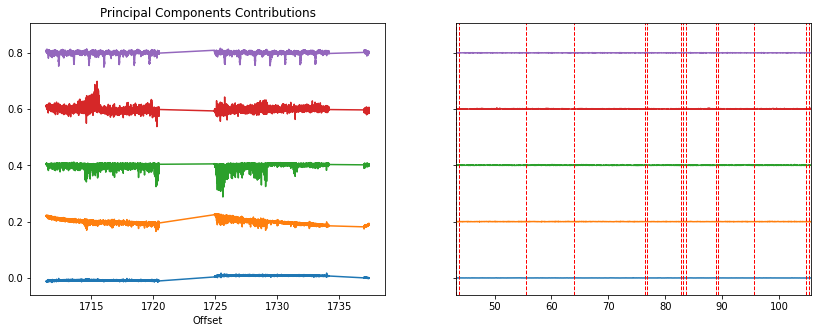

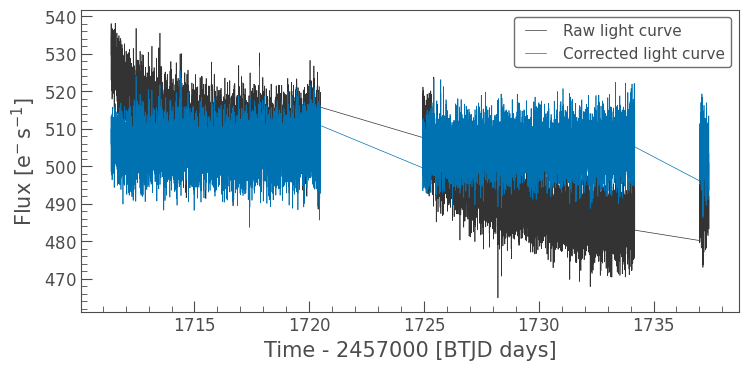

In [5]:
high_pca.plot_pca()

### From these plots we can see power at our frequencies is being removed when the number of principal components are greater than 4.

* If you are unsure of how many principal components to remove in the localization, you can use .autopca. This will provide an estimate in an attempt to ensure no signal of interest is removed in the PCA.

In [10]:
low_pca.autopca

0

In [11]:
high_pca.autopca

5

## Localizing the signal

In [12]:
low = tl.Localize(targetpixelfile=tpf, frequencies=low_frequency_list, frequnit=u.uHz, principal_components = 0)

In [6]:
high = tl.Localize(targetpixelfile=tpf, frequencies=high_frequency_list, frequnit=u.uHz, principal_components = 'auto')

C:\Users\higgi\anaconda3\lib\site-packages\astropy\units\quantity.py:479: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
C:\Users\higgi\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


TypeError: ufunc 'add' output (typecode 'O') could not be coerced to provided output parameter (typecode 'd') according to the casting rule ''same_kind''

     index          ra        dec               source          x          y  \
0       89  319.294964  34.196133  1855294415817908480   5.876951   2.998218   
1       92  319.295630  34.196130  1855294415817907840   5.961744   2.957995   
2       75  319.292226  34.192087  1855294312738692480   5.237045   2.537803   
3       98  319.291908  34.201217  1855294415817910144   5.852838   3.964698   
4       86  319.289577  34.200021  1855294312738695296   5.469589   3.919459   
..     ...         ...        ...                  ...        ...        ...   
219     82  319.281108  34.171989  1855294205359143808   2.373989   0.102886   
220     87  319.311307  34.220357  1855294450177649024   9.702034   5.758189   
221     90  319.310871  34.217522  1855294450177648384   9.442744   5.347074   
222     91  319.318528  34.214513  1855294381458168448  10.202716   4.425977   
223    223  319.241740  34.258541  1867305137241296768   3.582052  15.799980   

        Gmag    distance    likelihood 

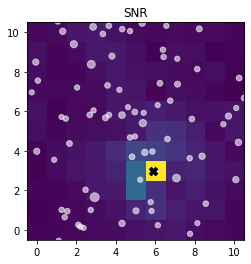

In [14]:
low.info()

In [ ]:
high.info()